In [1]:
using Pkg
Pkg.activate("./")

  Activating project at `~/UCL/3x2_analytical`


In [2]:
#using Turing
using LimberJack
using CSV
using NPZ
using YAML
using LinearAlgebra
using PythonCall
using ForwardDiff
using Plots
np = pyimport("numpy")
sacc = pyimport("sacc")

Python: <module 'sacc' from '/home/jaimerz/UCL/3x2_analytical/.CondaPkg/env/lib/python3.12/site-packages/sacc/__init__.py'>

# Analytic Margninalization

In [3]:
sacc_path = "/home/jaimerz/PhD/LimberJack.jl/data/FD/cls_FD_covG.fits"
yaml_path_wlwl = "/home/jaimerz/PhD/LimberJack.jl/data/DESY1/wlwl.yml"
yaml_path_gcgc = "/home/jaimerz/PhD/LimberJack.jl/data/DESY1/gcgc.yml"
yaml_path_3x2 = "/home/jaimerz/PhD/LimberJack.jl/data/DESY1/gcgc_gcwl_wlwl.yml"

sacc_wlwl = sacc.Sacc().load_fits(sacc_path)
sacc_gcgc = sacc.Sacc().load_fits(sacc_path)
sacc_3x2 = sacc.Sacc().load_fits(sacc_path)
yaml_wlwl = YAML.load_file(yaml_path_wlwl)
yaml_gcgc = YAML.load_file(yaml_path_gcgc)
yaml_3x2 = YAML.load_file(yaml_path_3x2) 

meta_wlwl, files_wlwl = make_data(sacc_wlwl, yaml_wlwl)
meta_gcgc, files_gcgc = make_data(sacc_gcgc, yaml_gcgc)
meta_3x2, files_3x2 = make_data(sacc_3x2, yaml_3x2)

DESwl__0 DESwl__0 24
DESwl__0 DESwl__1 24
DESwl__0 DESwl__2 24
DESwl__0 DESwl__3 24
DESwl__1 DESwl__1 24
DESwl__1 DESwl__2 24
DESwl__1 DESwl__3 24
DESwl__2 DESwl__2 24
DESwl__2 DESwl__3 24
DESwl__3 DESwl__3 24
DESgc__0 DESgc__0 5
DESgc__1 DESgc__1 8
DESgc__2 DESgc__2 10
DESgc__3 DESgc__3 11
DESgc__4 DESgc__4 13
DESgc__0 DESgc__0 5
DESgc__1 DESgc__1 8
DESgc__2 DESgc__2 10
DESgc__3 DESgc__3 11
DESgc__4 DESgc__4 13
DESgc__0 DESwl__0 5
DESgc__0 DESwl__1 5
DESgc__0 DESwl__2 5
DESgc__0 DESwl__3 5
DESgc__1 DESwl__0 8
DESgc__1 DESwl__1 8
DESgc__1 DESwl__2 8
DESgc__1 DESwl__3 8
DESgc__2 DESwl__0 10
DESgc__2 DESwl__1 10
DESgc__2 DESwl__2 10
DESgc__2 DESwl__3 10
DESgc__3 DESwl__0 11
DESgc__3 DESwl__1 11
DESgc__3 DESwl__2 11
DESgc__3 DESwl__3 11
DESgc__4 DESwl__0 13
DESgc__4 DESwl__1 13
DESgc__4 DESwl__2 13
DESgc__4 DESwl__3 13
DESwl__0 DESwl__0 24
DESwl__0 DESwl__1 24
DESwl__0 DESwl__2 24
DESwl__0 DESwl__3 24
DESwl__1 DESwl__1 24
DESwl__1 DESwl__2 24
DESwl__1 DESwl__3 24
DESwl__2 DESwl__2 24
DESw

(LimberJack.Instructions(["DESgc__0", "DESgc__1", "DESgc__2", "DESgc__3", "DESgc__4", "DESwl__0", "DESwl__1", "DESwl__2", "DESwl__3"], Any[["DESgc__0", "DESgc__0"], ["DESgc__1", "DESgc__1"], ["DESgc__2", "DESgc__2"], ["DESgc__3", "DESgc__3"], ["DESgc__4", "DESgc__4"], ["DESgc__0", "DESwl__0"], ["DESgc__0", "DESwl__1"], ["DESgc__0", "DESwl__2"], ["DESgc__0", "DESwl__3"], ["DESgc__1", "DESwl__0"]  …  ["DESwl__0", "DESwl__0"], ["DESwl__0", "DESwl__1"], ["DESwl__0", "DESwl__2"], ["DESwl__0", "DESwl__3"], ["DESwl__1", "DESwl__1"], ["DESwl__1", "DESwl__2"], ["DESwl__1", "DESwl__3"], ["DESwl__2", "DESwl__2"], ["DESwl__2", "DESwl__3"], ["DESwl__3", "DESwl__3"]], ["galaxy_density", "galaxy_density", "galaxy_density", "galaxy_density", "galaxy_density", "galaxy_shear", "galaxy_shear", "galaxy_shear", "galaxy_shear"], [0, 5, 13, 23, 34, 47, 52, 57, 62, 67  …  259, 283, 307, 331, 355, 379, 403, 427, 451, 475], [0.00019024248750512107, 7.391276663994371e-5, 4.261252890607883e-5, 2.22965965139283e-5

In [4]:
"""
sacc_path = "/home/jaimerz/PhD/LimberJack.jl/data/FD/cls_FD_covG.fits"
wlwl_yaml_path = "/home/jaimerz/PhD/LimberJack.jl/data/DESY1/wlwl.yml"
gcgc_yaml_path = "/home/jaimerz/PhD/LimberJack.jl/data/DESY1/gcgc.yml"
nzs_path = "/home/jaimerz/PhD/LimberJack.jl/data/DESY1/nzs/"

wlwl_sacc_file = sacc.Sacc().load_fits(sacc_path)
gcgc_sacc_file = sacc.Sacc().load_fits(sacc_path)
wlwl_yaml_file = YAML.load_file(wlwl_yaml_path)
gcgc_yaml_file = YAML.load_file(gcgc_yaml_path) 

wlwl_meta, wlwl_files = make_data(wlwl_sacc_file, wlwl_yaml_file)
gcgc_meta, gcgc_files = make_data(gcgc_sacc_file, gcgc_yaml_file)
"""

"sacc_path = \"/home/jaimerz/PhD/LimberJack.jl/data/FD/cls_FD_covG.fits\"\nwlwl_yaml_path = \"/home/jaimerz/PhD/LimberJack.jl/data/DESY1/wlwl.yml\"\ngcgc_yaml_path = \"/home/jaimerz/PhD/LimberJack.jl/data/DESY1/gcgc.yml\"\nnzs_path = \"/home/jaimerz/PhD/LimberJack.jl/data/DESY1/nzs" ⋯ 63 bytes ⋯ "_file = sacc.Sacc().load_fits(sacc_path)\nwlwl_yaml_file = YAML.load_file(wlwl_yaml_path)\ngcgc_yaml_file = YAML.load_file(gcgc_yaml_path) \n\nwlwl_meta, wlwl_files = make_data(wlwl_sacc_file, wlwl_yaml_file)\ngcgc_meta, gcgc_files = make_data(gcgc_sacc_file, gcgc_yaml_file)\n"

## T-Matrices wlwl

In [11]:
function model_wlwl(x; meta=meta_wlwl, files=files_wlwl)
    cosmo = Cosmology(Ωm=0.3, Ωb=0.05, h=0.67, σ8=0.81, ns=0.96,
    tk_mode=:EisHu, pk_mode=:Halofit)
    nuisances = Dict("DESwl__0_dz" => x[1],
                     "DESwl__1_dz" => x[2],
                     "DESwl__2_dz" => x[3],
                     "DESwl__3_dz" => x[4])
    return Theory(cosmo, meta, files; Nuisances=nuisances)
end;

function model_gcgc(x; meta=meta_gcgc, files=files_gcgc)
    cosmo = Cosmology(Ωm=0.3, Ωb=0.05, f=0.67, σ8=0.81, ns=0.96,
    tk_mode=:EisHu, pk_mode=:Halofit)
    DESgc__0_b = 1.9
    DESgc__1_b = 1.9
    DESgc__2_b = 1.9
    DESgc__3_b = 1.9
    DESgc__4_b = 1.9 
    nuisances = Dict("DESgc__0_b" => DESgc__0_b,
                     "DESgc__1_b" => DESgc__1_b,
                     "DESgc__2_b" => DESgc__2_b,
                     "DESgc__3_b" => DESgc__3_b,
                     "DESgc__4_b" => DESgc__4_b,
                     "DESgc__0_dz" => x[1],
                     "DESgc__1_dz" => x[2],
                     "DESgc__2_dz" => x[3],
                     "DESgc__3_dz" => x[4],
                     "DESgc__4_dz" => x[5])
    cosmo.settings.cosmo_type = eltype(valtype(x))
    return Theory(cosmo, meta, files; Nuisances=nuisances)
end;

function model_3x2(x; meta=meta_3x2, files=files_3x2)
    cosmo = Cosmology(Ωm=0.3, Ωb=0.05, h=0.67, σ8=0.81, ns=0.96,
    tk_mode=:EisHu, pk_mode=:Halofit)
    DESgc__0_b = 1.9
    DESgc__1_b = 1.9
    DESgc__2_b = 1.9
    DESgc__3_b = 1.9
    DESgc__4_b = 1.9 
    nuisances = Dict("DESgc__0_b" => DESgc__0_b,
                     "DESgc__1_b" => DESgc__1_b,
                     "DESgc__2_b" => DESgc__2_b,
                     "DESgc__3_b" => DESgc__3_b,
                     "DESgc__4_b" => DESgc__4_b,
                     "DESwl__0_dz" => x[1],
                     "DESwl__1_dz" => x[2],
                     "DESwl__2_dz" => x[3],
                     "DESwl__3_dz" => x[4],
                     "DESgc__0_dz" => x[5],
                     "DESgc__1_dz" => x[6],
                     "DESgc__2_dz" => x[7],
                     "DESgc__3_dz" => x[8],
                     "DESgc__4_dz" => x[9])
    cosmo.settings.cosmo_type = eltype(valtype(x))
    return Theory(cosmo, meta, files; Nuisances=nuisances)
end;

In [12]:
function make_Cmod(dz_cov, data_cov, model; mode="FD")
    m = size(dz_cov)[1]
    n_cls = size(data_cov)[1]
    T = zeros(n_cls, m)
    if mode == "AD"
        println("Using automatic differentiation to compute T")
        null = zeros(n)
        T = ForwardDiff.jacobian(model, null)
    elseif mode == "FD"
        println("Using finite differences to compute T")
        d = 0.00005
        for i in 1:m
            dz = zeros(m)
            e = zeros(m)
            e[i] = d
            T[:, i] = (model(dz.+e) .- model(dz.-e)) ./ (2*d)
        end
    end
    TPT = T * dz_cov * T'
    Cmod = Symmetric(data_cov + TPT)
    return Cmod
end

make_Cmod_dz (generic function with 1 method)

In [13]:
cosmo = Cosmology(Ωm=0.3, Ωb=0.05, h=0.67, σ8=0.81, ns=0.96,
tk_mode=:EisHu, pk_mode=:Halofit);

In [14]:
dz_cov = [0.017^2 0 0 0; 
          0 0.017^2 0 0;
          0 0 0.013^2 0;
          0 0 0 0.015^2]

4×4 Matrix{Float64}:
 0.000289  0.0       0.0       0.0
 0.0       0.000289  0.0       0.0
 0.0       0.0       0.000169  0.0
 0.0       0.0       0.0       0.000225

In [15]:
C_mod = make_Cmod_dz(dz_cov, meta_wlwl.cov, model_wlwl)

Using finite differences to compute T


240×240 Symmetric{Float64, Matrix{Float64}}:
  1.539e-18    -5.88995e-20   2.6019e-20   …  -8.13685e-24  -7.39618e-24
 -5.88995e-20   5.36211e-19  -2.89911e-20     -1.79796e-24  -1.88294e-24
  2.6019e-20   -2.89911e-20   3.07788e-19     -8.56731e-25  -8.93461e-25
  1.23254e-20   8.75417e-21  -2.11653e-20     -4.3922e-25   -4.57366e-25
  8.81225e-21   4.09071e-21   3.79805e-21     -2.58236e-25  -2.74889e-25
  6.30933e-21   3.18431e-21   1.54519e-21  …  -1.66529e-25  -1.8202e-25
  4.81078e-21   2.43627e-21   1.37612e-21     -1.12535e-25  -1.27489e-25
  3.70583e-21   1.89034e-21   1.10079e-21     -7.88128e-26  -9.25381e-26
  2.87195e-21   1.47394e-21   8.61159e-22     -5.62207e-26  -6.64e-26
  2.20144e-21   1.13711e-21   6.77732e-22     -4.44747e-26  -4.27483e-26
  1.69597e-21   8.83838e-22   5.28974e-22  …  -3.19482e-26  -2.94555e-26
  1.31259e-21   6.90941e-22   4.20571e-22     -2.21107e-26  -2.01397e-26
  1.0125e-21    5.38647e-22   3.31832e-22     -1.4983e-26   -1.32242e-26
  ⋮       

In [18]:
abs.(diag(meta_wlwl.cov) .- diag(C_mod)) ./ diag(meta_wlwl.cov)

240-element Vector{Float64}:
 0.04644379102838629
 0.031115821091106954
 0.01743001344430385
 0.0102024083272564
 0.0062433881092613785
 0.00401446848411431
 0.0026945611500112498
 0.0020044412629478562
 0.0016267429215785646
 0.001270911134144418
 0.0009674416828052108
 0.0007497162349003986
 0.000563604518139147
 ⋮
 0.0014983713093849518
 0.0011928300470769886
 0.0009467283495799273
 0.0007287296096786583
 0.0005651076186775493
 0.0004249870156439953
 0.0003199604815047085
 0.00023746788295422785
 0.0001743118817353401
 0.00012716608599668155
 9.176158824981562e-5
 6.562149829826219e-5

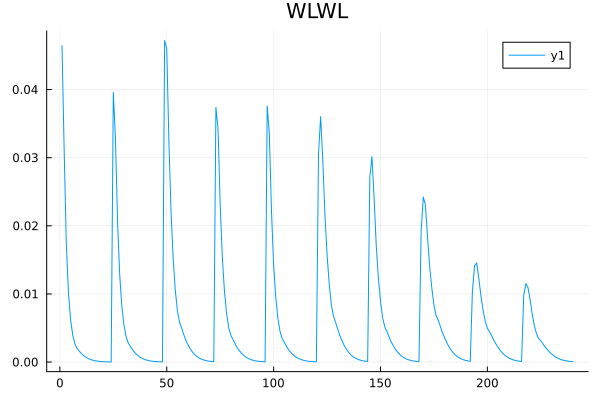

In [20]:
plot(abs.(diag(meta_wlwl.cov) .- diag(C_mod)) ./ diag(meta_wlwl.cov),  title="WLWL")


In [ ]:
npzwrite("../../data/DESY1/nzs/wlwl_dz_cov_marg.npz",
        Dict("cov_marg" => C_mod,
             "inv_cov_marg" => inv_C_mod))

In [ ]:
C_mod = make_Cmod_Nz(cov_k0, cov_k1, cov_k2, cov_k3; cosmo=cosmo)
inv_C_mod = inv(C_mod);

In [ ]:
plot(abs.(diag(wlwl_meta.cov) .- diag(C_mod)) ./ diag(wlwl_meta.cov), label="cosmo1", title="Nz - abs(C'-C) / C")

In [ ]:
npzwrite("../../data/DESY1/nzs/wlwl_nz_cov_marg.npz",
        Dict("cov_marg" => C_mod,
             "inv_cov_marg" => inv_C_mod))

## T-Matrices gcgc

In [ ]:
function model_cov_dz_gc(x; meta=gcgc_meta, files=gcgc_files, cosmo=cosmo) 
    #cosmology.settings.cosmo_type = Real
    nuisances = Dict("DESgc__0_b" => 1.49,
                     "DESgc__1_b" => 1.81,
                     "DESgc__2_b" => 1.79,
                     "DESgc__3_b" => 2.18,
                     "DESgc__4_b" => 2.24,
                     "DESgc__0_dz" => x[1],
                     "DESgc__1_dz" => x[2],
                     "DESgc__2_dz" => x[3],
                     "DESgc__3_dz" => x[4],
                     "DESgc__4_dz" => x[5])    
    return Theory(cosmo, meta, files; Nuisances=nuisances)
end;

In [ ]:
function model_cov_nz_gc(DESgc__0_nz, DESgc__1_nz, DESgc__2_nz, DESgc__3_nz, DESgc__4_nz;
                      meta=gcgc_meta, files=gcgc_files, cosmo=cosmo) 
    #cosmology.settings.cosmo_type = Real
    nuisances = Dict("DESgc__0_b" => 1.49,
                     "DESgc__1_b" => 1.81,
                     "DESgc__2_b" => 1.79,
                     "DESgc__3_b" => 2.18,
                     "DESgc__4_b" => 2.24,   
                     "DESgc__0_nz" => DESgc__0_nz,
                     "DESgc__1_nz" => DESgc__1_nz,
                     "DESgc__2_nz" => DESgc__2_nz,
                     "DESgc__3_nz" => DESgc__3_nz,
                     "DESgc__4_nz" => DESgc__4_nz)  
    return Theory(cosmo, meta, files; Nuisances=nuisances)
end;

In [ ]:
function make_Cmod_dz_gc(dz_cov; cosmo=cosmo, meta=gcgc_meta)
    d = 0.00005
    n_cls = 47
    m  = 5
    T = zeros(n_cls, m)
    for i in 1:m
        dz = zeros(m)
        e = zeros(m)
        e[i] = d
        T[:, i] = (model_cov_dz_gc(dz.+e; cosmo=cosmo) .- model_cov_dz_gc(dz.-e; cosmo=cosmo)) ./ (2*d)
    end
    TPT = T * dz_cov * T'
    Cmod = Symmetric(meta.cov + TPT)
    return Cmod
end

In [ ]:
function make_Cmod_Nz_gc(cov_k0, cov_k1, cov_k2, cov_k3, cov_k4; cosmo=cosmo, meta=gcgc_meta)
    d = 0.005
    n_cls = 47
    m  = length(nz_0)
    println(m)
    T0 = zeros(n_cls, m)
    T1 = zeros(n_cls, m)
    T2 = zeros(n_cls, m)
    T3 = zeros(n_cls, m)
    T4 = zeros(n_cls, m)

    for i in 1:m
        e = zeros(m)
        e[i] = d
        T0[:, i] = (model_cov_nz_gc(nz_0.+e, nz_1, nz_2, nz_3, nz_4; cosmo=cosmo) .- model_cov_nz_gc(nz_0.-e, nz_1, nz_2, nz_3, nz_4; cosmo=cosmo)) ./ (2*d)
        T1[:, i] = (model_cov_nz_gc(nz_0, nz_1.+e, nz_2, nz_3, nz_4; cosmo=cosmo) .- model_cov_nz_gc(nz_0, nz_1.-e, nz_2, nz_3, nz_4; cosmo=cosmo)) ./ (2*d)
        T2[:, i] = (model_cov_nz_gc(nz_0, nz_1, nz_2.+e, nz_3, nz_4; cosmo=cosmo) .- model_cov_nz_gc(nz_0, nz_1, nz_2.-e, nz_3, nz_4; cosmo=cosmo)) ./ (2*d)
        T3[:, i] = (model_cov_nz_gc(nz_0, nz_1, nz_2, nz_3.+e, nz_4; cosmo=cosmo) .- model_cov_nz_gc(nz_0, nz_1, nz_2, nz_3.-e, nz_4; cosmo=cosmo)) ./ (2*d)
        T4[:, i] = (model_cov_nz_gc(nz_0, nz_1, nz_2, nz_3, nz_4.+e; cosmo=cosmo) .- model_cov_nz_gc(nz_0, nz_1, nz_2, nz_3, nz_4.+e; cosmo=cosmo)) ./ (2*d)
    end
    TT0 = T0 * (cov_k0) * T0'
    TT1 = T1 * (cov_k1) * T1'
    TT2 = T2 * (cov_k2) * T2'
    TT3 = T3 * (cov_k3) * T3'
    TT4 = T4 * (cov_k4) * T4';
    Cmod = Symmetric(meta.cov + TT0 + TT1 + TT2 + TT3 + TT4)
    return Cmod
end

In [ ]:
nz_0 = pyconvert(Vector{Float64}, nz_DESgc__0["dndz"])
nz_1 = pyconvert(Vector{Float64}, nz_DESgc__1["dndz"])
nz_2 = pyconvert(Vector{Float64}, nz_DESgc__2["dndz"])
nz_3 = pyconvert(Vector{Float64}, nz_DESgc__3["dndz"])
nz_4 = pyconvert(Vector{Float64}, nz_DESgc__4["dndz"]);

In [ ]:
cov_k0 = pyconvert(Vector{Vector{Float64}}, nz_DESgc__0["cov"])
cov_k0 = Diagonal(permutedims(hcat(cov_k0...)))

cov_k1 = pyconvert(Vector{Vector{Float64}}, nz_DESgc__1["cov"])
cov_k1 = Diagonal(permutedims(hcat(cov_k1...)))

cov_k2 = pyconvert(Vector{Vector{Float64}}, nz_DESgc__2["cov"])
cov_k2 = Diagonal(permutedims(hcat(cov_k2...)))
    
cov_k3 = pyconvert(Vector{Vector{Float64}}, nz_DESgc__3["cov"])
cov_k3 = Diagonal(permutedims(hcat(cov_k3...)))

cov_k4 = pyconvert(Vector{Vector{Float64}}, nz_DESgc__4["cov"])
cov_k4 = Diagonal(permutedims(hcat(cov_k4...)));

In [ ]:
cosmo = Cosmology(0.30, 0.05, 0.67, 0.96, 0.81,
                  tk_mode="EisHu", 
                  Pk_mode="Halofit");

In [ ]:
dz_cov = [0.007^2 0 0 0 0; 
          0 0.007^2 0 0 0;
          0 0 0.006^2 0 0;
          0 0 0 0.010^2 0;
          0 0 0 0 0.010^2]
C_mod = make_Cmod_dz_gc(dz_cov; cosmo=cosmo)
inv_C_mod = inv(C_mod);

In [ ]:
plot(abs.(diag(gcgc_meta.cov) .- diag(C_mod)) ./ diag(gcgc_meta.cov), label="cosmo1", title="dz --- abs(C'-C) / C")
plot!([5, 13, 23, 34, 47], [0, 0, 0, 0, 0], seriestype=:scatter)


In [ ]:
npzwrite("../../data/DESY1/nzs/gcgc_dz_cov_marg.npz",
        Dict("cov_marg" => C_mod,
             "inv_cov_marg" => inv_C_mod))

In [ ]:
C_mod = make_Cmod_Nz_gc(cov_k0, cov_k1, cov_k2, cov_k3, cov_k4; cosmo=cosmo)
inv_C_mod = inv(C_mod);

In [ ]:
plot(abs.(diag(gcgc_meta.cov) .- diag(C_mod)) ./ diag(gcgc_meta.cov), label="cosmo1", title="Nz - abs(C'-C) / C")
plot!([5, 13, 23, 34, 47], [0, 0, 0, 0, 0], seriestype=:scatter)


In [ ]:
npzwrite("../../data/DESY1/nzs/gcgc_nz_cov_marg.npz",
        Dict("cov_marg" => C_mod,
             "inv_cov_marg" => inv_C_mod))